# Librairies scientifiques

A l'issue de cette séance, vous serez plus à l'aise avec deux des  librairies que nous utiliserons régulièrement : numpy et matplotlib.

Nous allons commencer par voir comment la structure numpy.array facilite certaines opérations courantes, en reprenant les exercices vu précédemment.

In [16]:
# La cellule suivante reviendra régulièrement dans les différents notebooks
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

`%matplotlib inline ` : cette ligne permet de générer les graphes au sein du notebook au lieu d'ouvrir une nouvelle fenêtre

In [17]:
v = np.arange(20)
print(v)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [18]:
v.shape

(20,)

In [19]:
print(v.reshape(10,2))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]


In [20]:
print(v.reshape(2,10))

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]


In [21]:
print(v.reshape(2,10).T)

[[ 0 10]
 [ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]
 [ 5 15]
 [ 6 16]
 [ 7 17]
 [ 8 18]
 [ 9 19]]


In [22]:
# afficher la moyenne de v
print(v.mean())

9.5


In [23]:
# afficher la mediane de v
print(np.median(v))

9.5


In [24]:
# calculer le produit scalaire de v et de u, et l'angle entre les 2 vecteurs
u = v - 1
print(u@v)

2280


`np.median` s'utilise comme une méthode de classe, ie elle est à partir du module numpy et non à partir de l'instance `v`.

`np.mean` peut également être utilisé comme méthode de classe, mais dans ce cas il faut préciser l'argument

Notez la différence entre
```
v.mean()
np.mean(v)
```

Dans le premier cas, `mean` est appelé depuis l'instance `v`, à laquelle sont déjà associée des données. La fonction sait donc quelles valeurs elle prend en paramètre

Numpy permet d'opérer directement sur l'array pour des opérations algébriques, au lieu de boucler sur tous les éléments.

Il fournit également des fonctions "vectorialisée", qui prennnent un array en entrée et retourne un array en sortie avec la fonction appliquée à chaque entrée

In [25]:
from math import sqrt
print([sqrt(x) for x in range(10)])

[0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]


In [26]:
# utiliser la fonction sqrt de numpy
print(sqrt(4*4+3*3))

5.0


## Modèle linéaire

Nous allons illustrer quelques principes fondamentaux à l'aide de nos nouvelles connaissances en Python. La régression linéaire est l'exemple royal pour cet exercice, et nous permettra de nous familiariser avec de nombreux sujets, sans être noyés par la complexité du modèle, qui reste l'un des plus simple.

$$y \sim f_{\theta}(x)$$

avec comme fonction f une forme linéaire

$$f_{\theta}(x) = \theta_0 + \theta_1 x +\epsilon $$


On introduit $\epsilon$ un terme d'erreur qui prend en compte la nature probabiliste des données, et leur déviation du modèle idéal.


### Hypothèses du modèle linéaire

* les erreurs suivent une loi normale de moyenne nulle
* la variance est la même pour tous (homoscédasticité) : la variance est la même pour l'ensemble des termes d'erreures gaussiens
$Var(\epsilon_i)=\sigma$
* les termes d'erreurs pour les différents $x_i$ sont indépendants les uns des autres



Afin de nous familiariser avec ce modèle, nous allons générer des points qui obéissent aux équations définies ci-dessus, et les représenter graphiquement

Commençons par définir un vecteur X qui est notre variable indépendante, **variant aléatoirement entre 0 et 10**, nous pouvons procéder de différentes façons
1. Avec une boucle
1. Avec une list comprehension
1. En utilisant le module numpy

In [27]:
import random
import numpy as np
%matplotlib inline

avec une boucle

In [28]:
X = lambda : random.randint(0,10)
print(X())

3


avec une compréhension de liste

In [29]:
print([X() for i in range(10)])

[10, 10, 6, 5, 7, 10, 1, 2, 9, 0]


avec numpy

In [38]:
vals = np.random.randint(0,10,10)
print(vals)

[3 2 4 2 0 1 9 2 1 0]


Représenter l'histogramme des valeurs prises par la variable aléatoire X

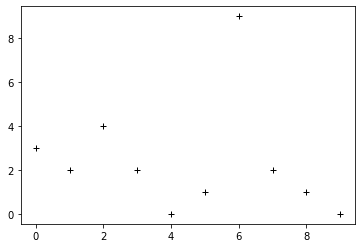

In [40]:
fig, ax = plt.subplots()
ax.plot(vals, '+k')

Représenter la droite y = 5x + 1

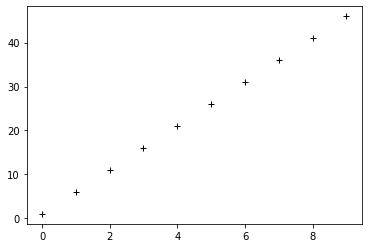

In [43]:
del fig, ax

x = np.arange(10)
f = lambda x: 5*x+1
fig, ax = plt.subplots()
ax.plot(x, f(x), '+k')


### Bruit gaussien

Dans le monde réel les données sont toujours entachées de bruits. Nous considérons ici que le bruit est gaussien.

Pour rappel, la densité de probabilité gaussienne/normale :  
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$$

Nous pouvons échantiller depuis une loi normale avec la fonction `normalvariate` du module `random` standard, ou utiliser encore une fois `numpy`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


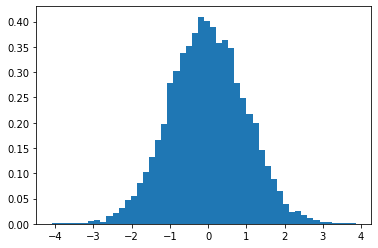

In [44]:
from random import normalvariate
y_normal = [normalvariate(0,1) for i in range(10000)] #ceci est une boucle
plt.hist(y_normal, bins=50, normed=True)
plt.show()

`normalvariate` génère une valeur à chaque fois (théoriquement entre $-\infty$ et $+\infty$). La probabilité que cette valeur soit dans un certain intervalle est donnée par $Pr(x_1<x<x_2) = \int_{x_1}^{x_2} p(x).dx $

<img src="img/Standard_deviation_diagram.svg.png">

Refaisons le même exercice avec numpy et sans boucle

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


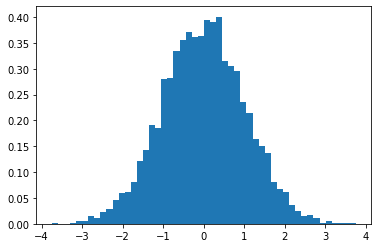

In [45]:
y_normal = np.random.normal(0,1,10000)
plt.hist(y_normal, bins=50, normed=True)
plt.show()

Ajoutons maintenant la composante linéaire et la composante gaussienne au sein d'une fonction

In [46]:
def linear(x, params=(0,1)):
    """Generate a linear function f(x)=a*x+b+N(0,1)
    
    Args:
        x (numpy.array()) : vector used to generate the output
        params (tuple of size 2) : b=params[0] and a=params[1]
    
    Returns:
        numpy.array()
    """
    a,b = params
    return (b + a*x) + np.random.normal(0,1, len(x))

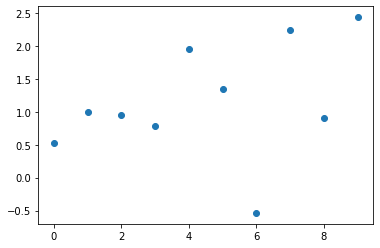

In [47]:
plt.scatter(x, linear(x))
plt.show()

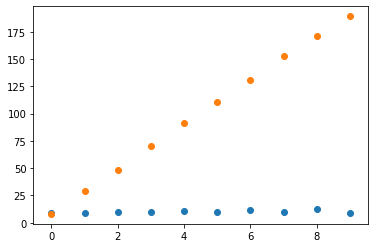

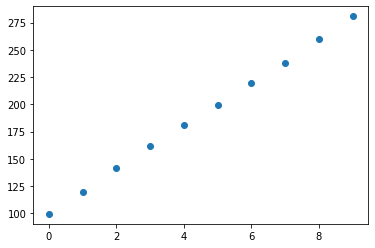

In [48]:
plt.scatter(x, linear(x, (0,10)))
plt.scatter(x, linear(x, (20,10)))
plt.figure() #on instancie un nouvel objet figure, pour ne pas mélanger les prochains graphes avec les précédents
plt.scatter(x, linear(x, (20,100)))
plt.show()

## Synthèse

À l'issue de ce cours, vous savez manipulez des array de numpy (et faites la distinction avec les listes, les sets et les tuples), faire des opérations algébriques, afficher des scatter plot et des histogrammes et générer des échantillons aléatoires de points.